In [ ]:
# autorizar acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. import libraries

In [ ]:
!pip install category_encoders shap

# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# data processing
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# explainability
import shap

# 2. Load the dataset

In [ ]:
ruta = '/content/drive/MyDrive/BOOTCAMP/Python for bussines insights/Proyecto/fraud.csv'  # Assign the file path to ruta
data = pd.read_csv(ruta) # Read the csv file using the ruta variable
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


In [ ]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# 3. Exploratory Data Analysis

In [ ]:
# Data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [ ]:
# Dataset size
print("Dataset size:", data.shape)

Dataset size: (15420, 33)


In [ ]:
# General descriptive statistics
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
# Unique values in each column
for col in data.columns:
  print(f"Unique values in column '{col}': {data[col].unique()}")


Unique values in column 'Month': ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Unique values in column 'WeekOfMonth': [5 3 2 4 1]
Unique values in column 'DayOfWeek': ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Unique values in column 'Make': ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
Unique values in column 'AccidentArea': ['Urban' 'Rural']
Unique values in column 'DayOfWeekClaimed': ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
Unique values in column 'MonthClaimed': ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Unique values in column 'WeekOfMonthClaimed': [1 4 2 3 5]
Unique values in column 'Sex': ['Female' 'Male']
Unique values in column 'MaritalStatus': ['Single' 'Married' 'Widow' 'Divorced']
Unique values in column 'Age': [21 34 47 65 27

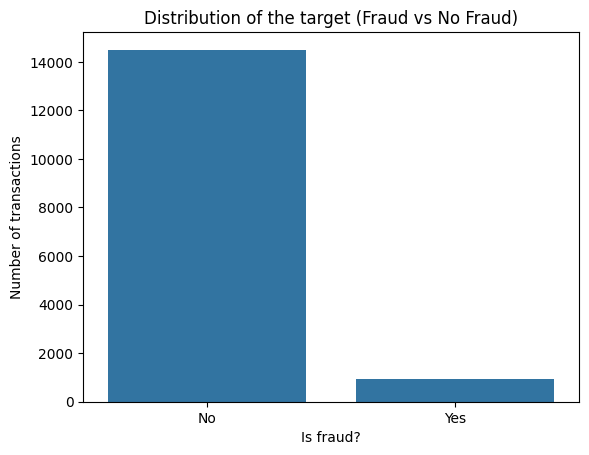


Distribution of the target:
FraudFound
No     94.014267
Yes     5.985733
Name: proportion, dtype: float64


In [ ]:
# Distribution of the target
import seaborn as sns
import matplotlib.pyplot as plt

# Count
sns.countplot(x='FraudFound', data=data)
plt.title("Distribution of the target (Fraud vs No Fraud)")
plt.xlabel("Is fraud?")
plt.ylabel("Number of transactions")
plt.show()

# Porcentaje de clases
print("\nDistribution of the target:")
print(data['FraudFound'].value_counts(normalize=True) * 100)

# Análisis narrativo
La target presenta un fuerte desbalance de clases, el 94.01% de los casos están etiquetados como "No" (no se encontró fraude), mientras que, el 5.98% de los casos están etiquetados como "Yes" (se encontró fraude).

Esto nos dice que, aunque el dataset es extenso, el número de fraudes detectados es relativamente pequeño, lo cual implica que se deberán aplicar técnicas de balanceo durante el modelado.

Categorical variables: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'BasePolicy', 'FraudFound']


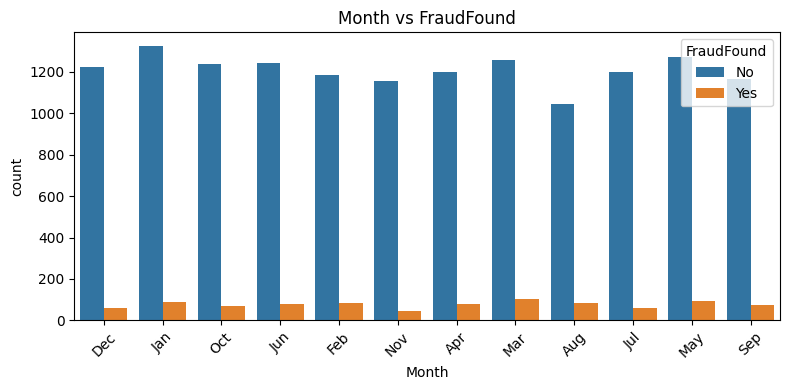

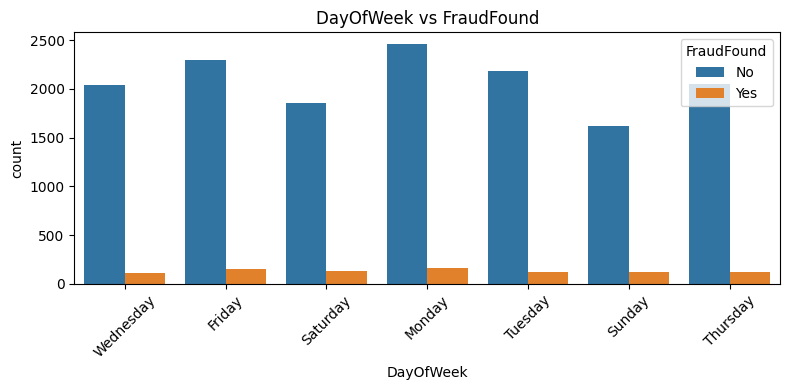

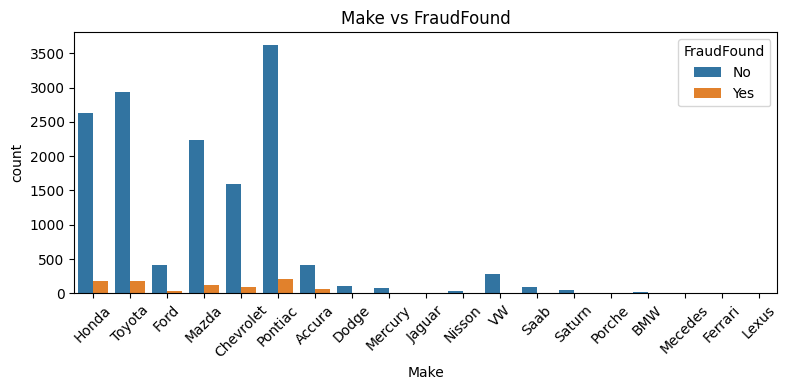

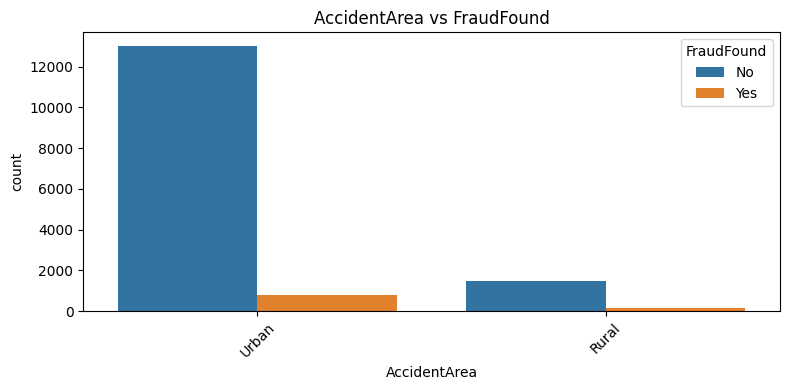

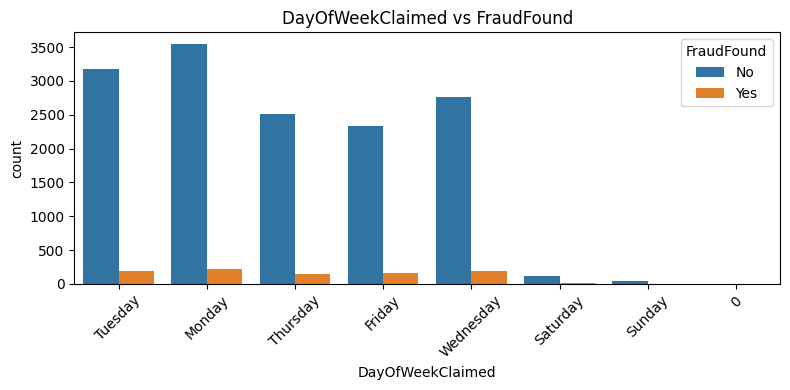

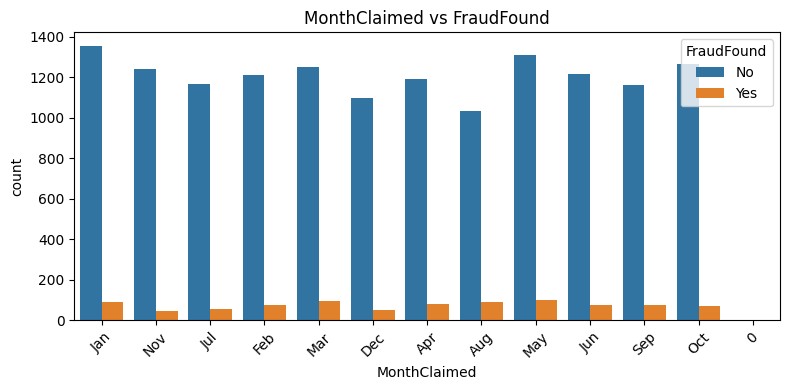

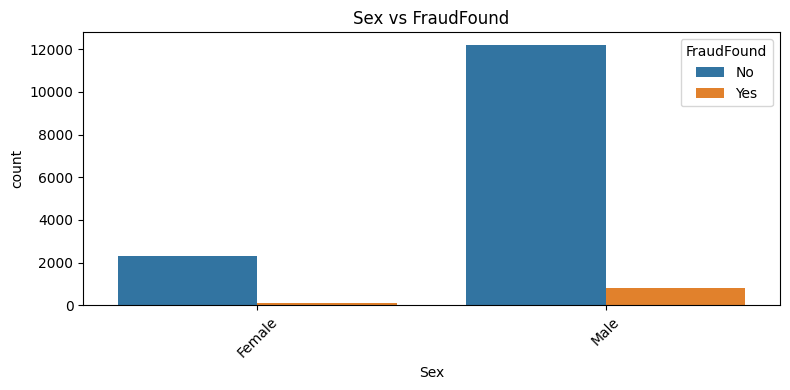

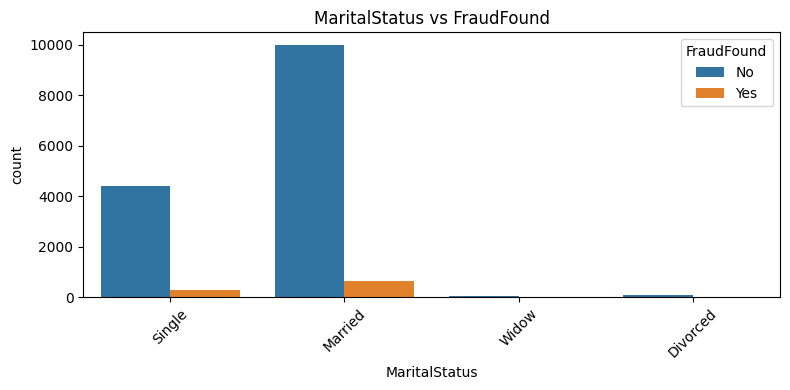

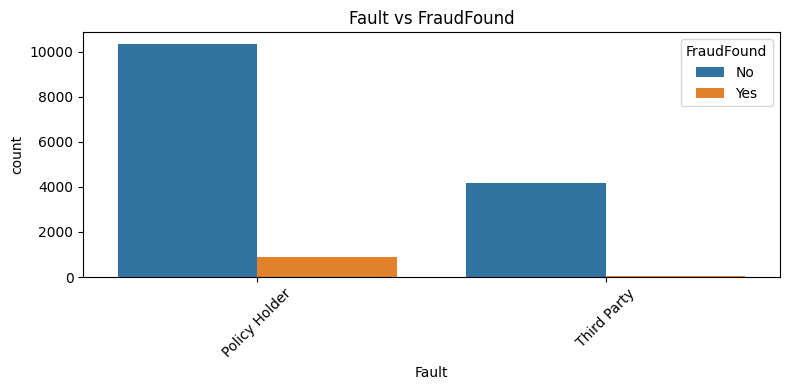

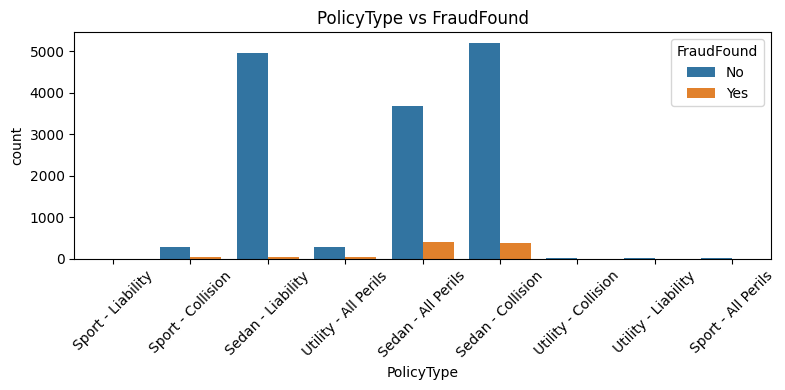

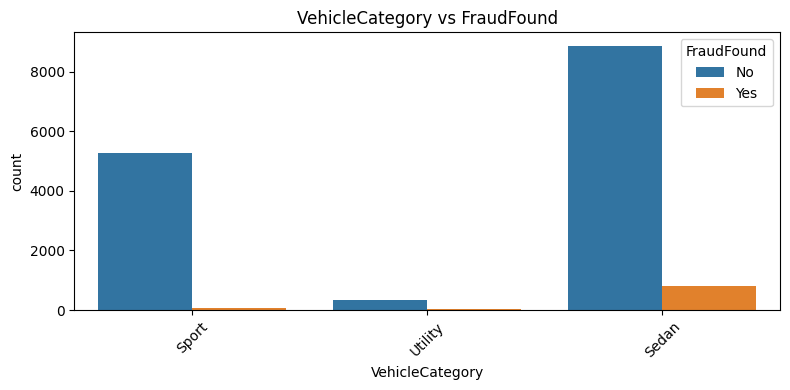

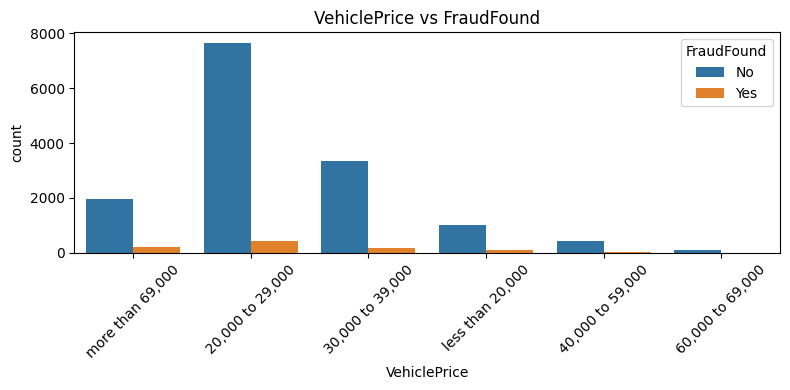

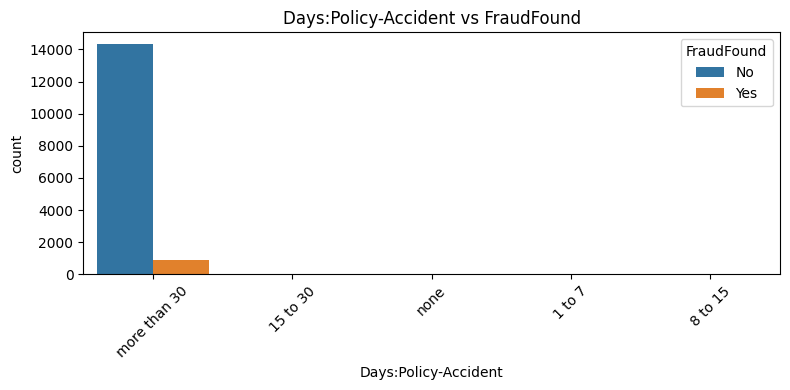

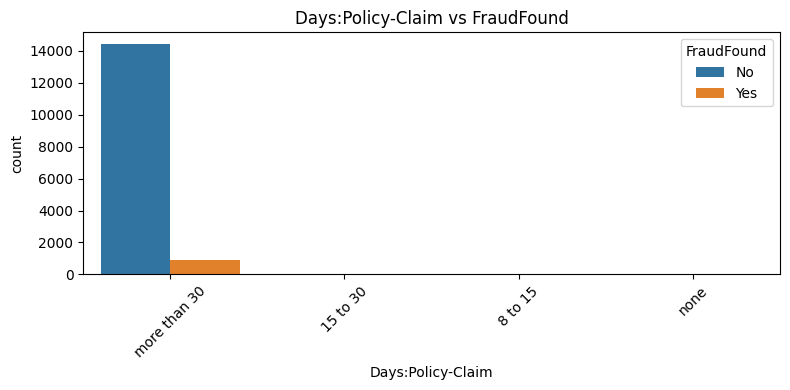

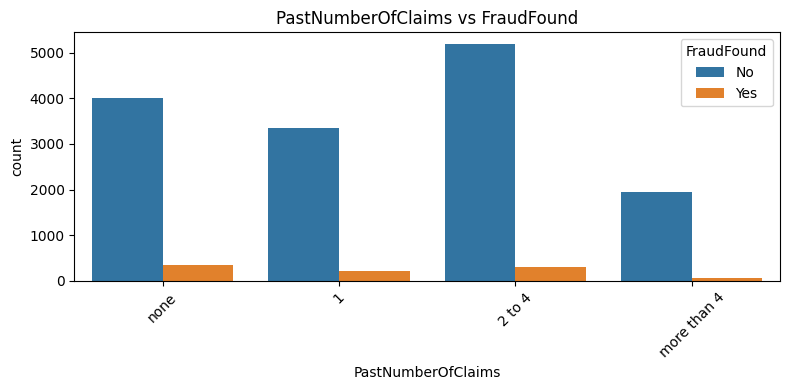

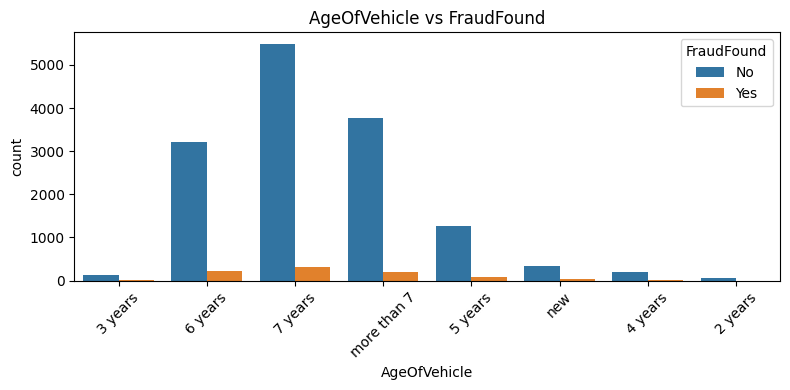

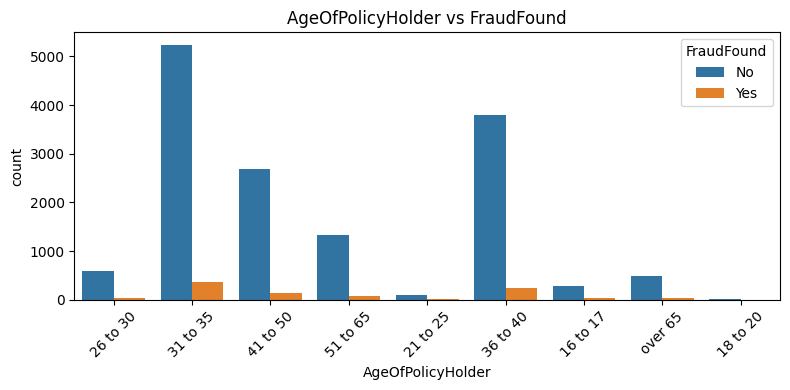

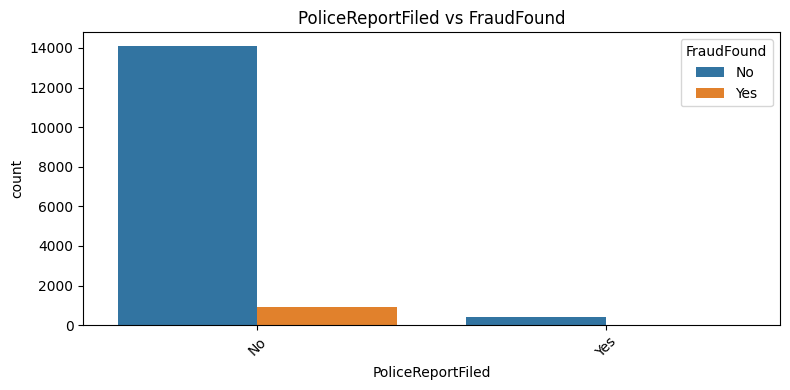

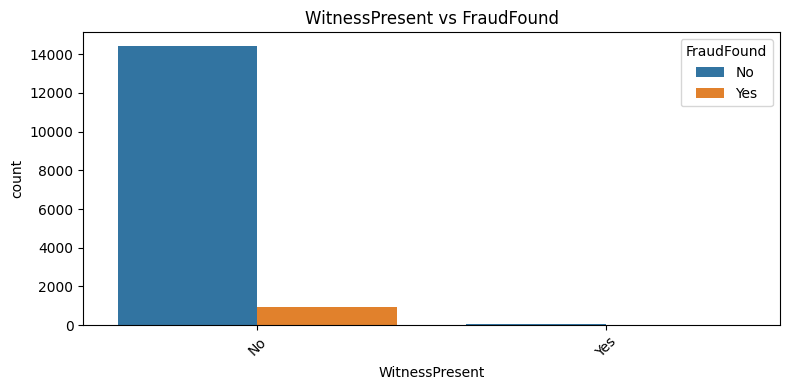

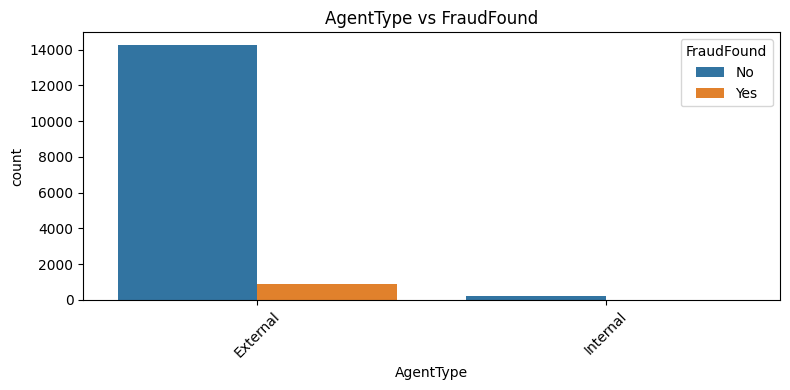

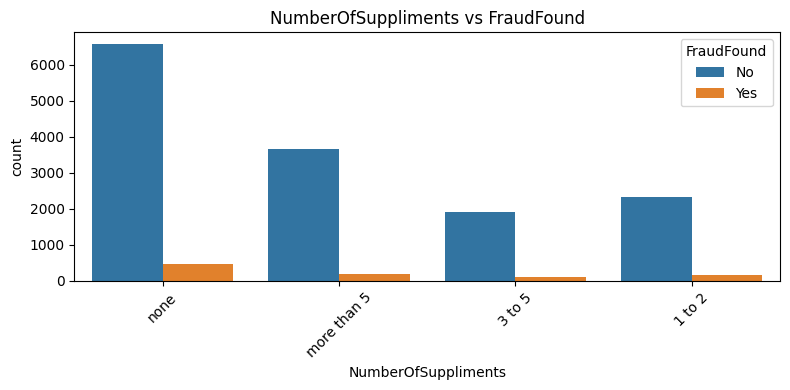

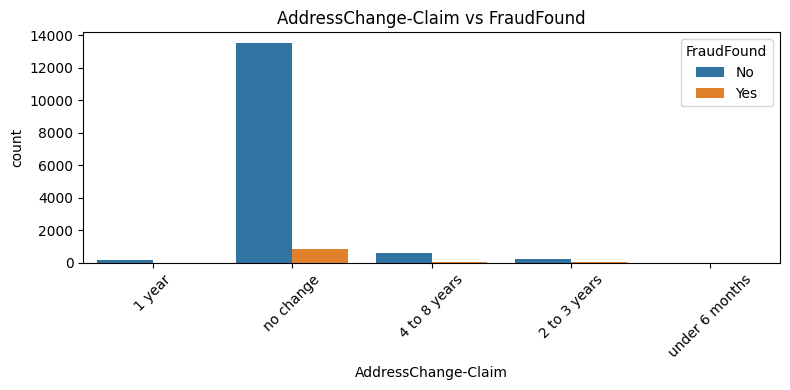

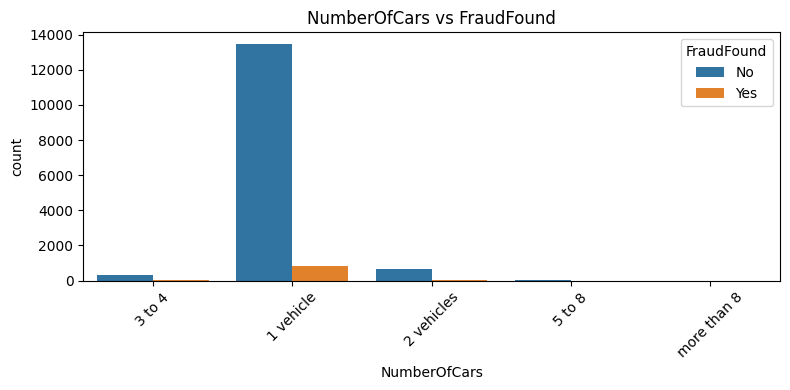

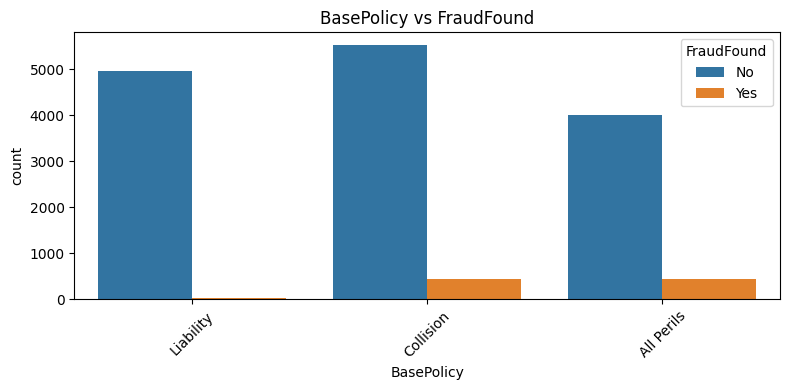

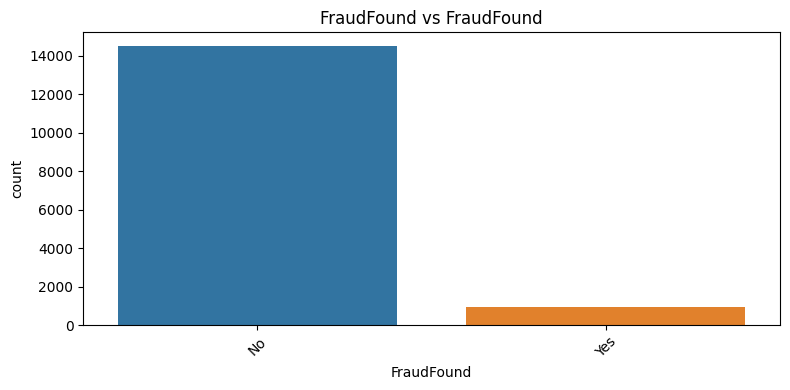

In [ ]:
# Display of categorical variables
# View categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()
print("Categorical variables:", cat_cols)

# Visualization of the categorical variables versus the target variable
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='FraudFound')
    plt.title(f"{col} vs FraudFound")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Análisis narrativo
- Variables "Month" y "MonthClaimed" en ambas Jan figura como el mes más frecuente, lo que indica una estacionalidad en los reclamos.
- Variable "Make" de sus 19 categorías, Pontiec representa una mayoría en los registros, lo que podría sesgar las predicciones si está correlacionado con la target.
- Variables "DayOfWeek" y "DayOfWeekClaimed" marcan que el Lunes es el día más frecuente tanto para accidentes como para reclamos, lo que podría reflejar procesos administrativos.
- Variable "AccidentArea" refleja que la mayor parte de los accidentes ocurren en áreas urbanas, lo cual sugiere un fuerte sesgo hacia zonas más pobladas.
- Variable "Sex" muestra que la mayoría de los accidentes son generados por hombres.
- Variable "MaritalStatus" muestra una mayoría de personas son casadas.
- Variable "Fault" muestra que la mayoría de casos la culpa recae en el titular de la póliza, lo cual podría relacionarse con la propensión a fraudes.

Numerical variables: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']


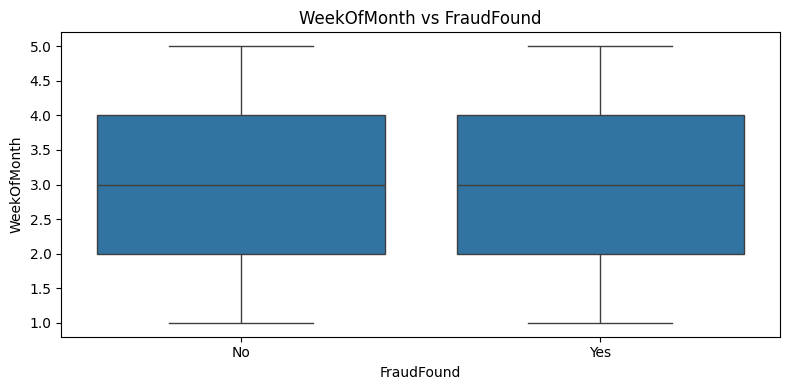

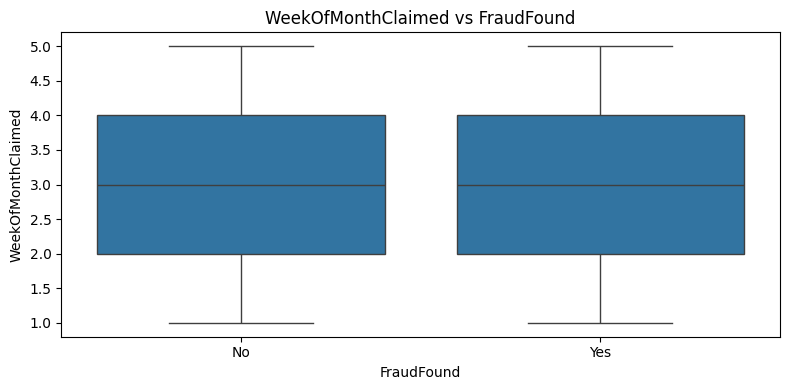

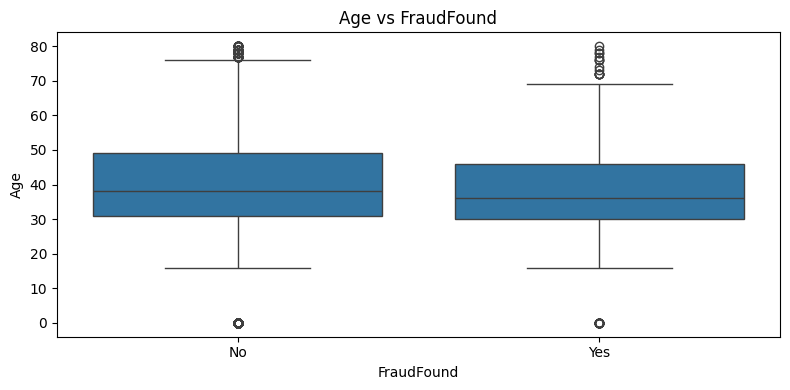

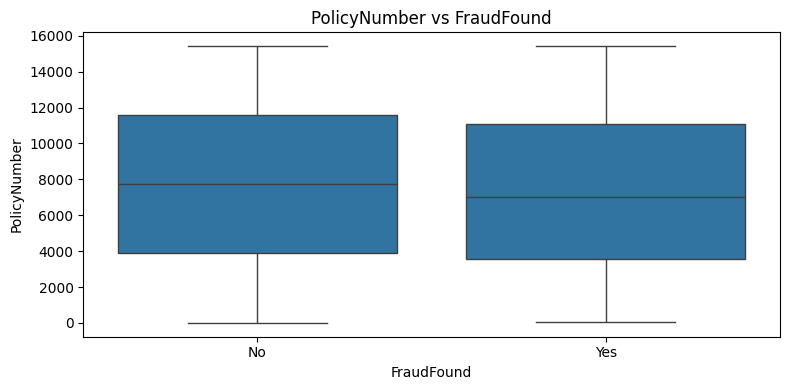

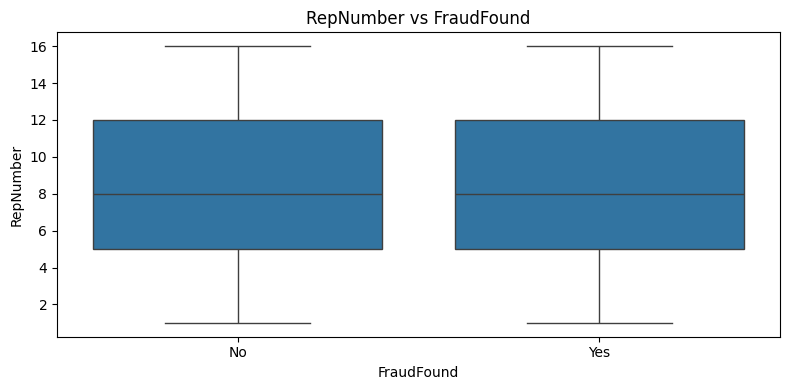

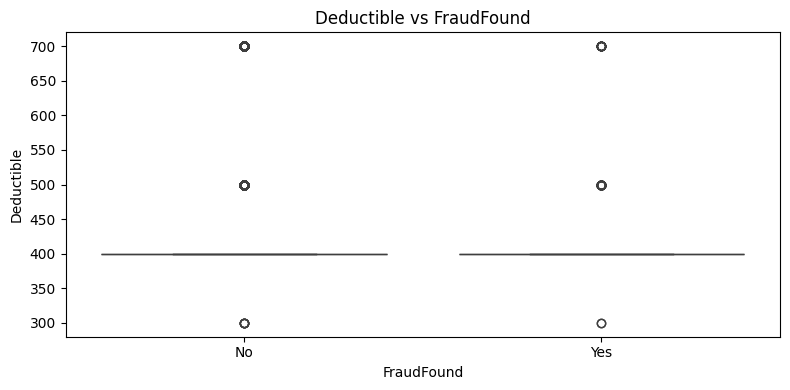

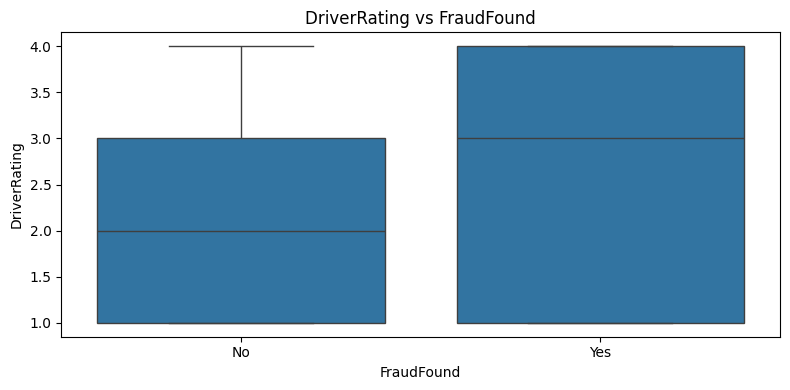

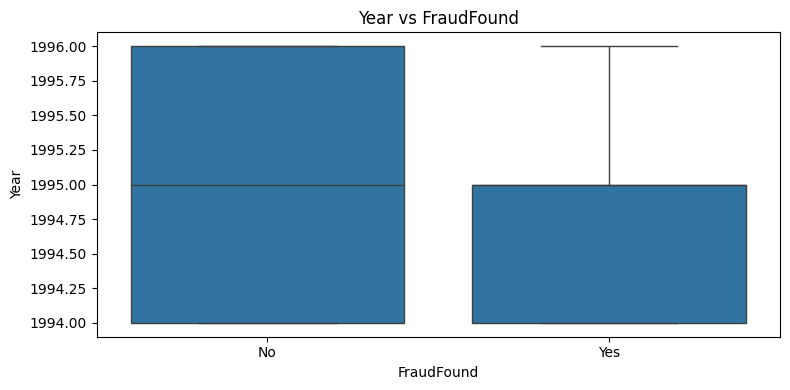

In [ ]:
# Display of numerical variables
# View numerical variables
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical variables:", num_cols)

# Remove the target if it is in num_cols to plot only the features
num_cols = [col for col in num_cols if col != 'FraudFound']

# Boxplots to see outliers and differences by class
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='FraudFound', y=col)
    plt.title(f"{col} vs FraudFound")
    plt.tight_layout()
    plt.show()

# Análisis narrativo
- Variable "Age", varía de 0 a 80 años, con un promedio de 39 años, la presencia de edades "0" podría indicar registros erróneos o faltantes codificados incorrectamente, además se evidencia que los casos de fraude tienden a concentrarse ligeramente en grupos etarios más jóvenes, entre 20 a 40 años, lo que indica que tienen mayores probabilidades de riesgo.
- Variables "WeekOfMonth" y "WeekOfMonthClaimed" no se observa una diferencia fuerte entre fraudes y no fraudes respecto a la semana del mes en la que ocurrió el incidente o se hizo la reclamación.
- Variable "DriverRating" se presentan fraudes en todas las calificaciones, aunque hay una ligera mayor proporción de fraudes en conductores con calificación más baja.

In [ ]:
# Outlier detection
#Numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Outlier detection using IQR
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    percent = len(outliers) / len(data) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")

WeekOfMonth: 0 outliers (0.00%)
WeekOfMonthClaimed: 0 outliers (0.00%)
Age: 547 outliers (3.55%)
PolicyNumber: 0 outliers (0.00%)
RepNumber: 0 outliers (0.00%)
Deductible: 582 outliers (3.77%)
DriverRating: 0 outliers (0.00%)
Year: 0 outliers (0.00%)


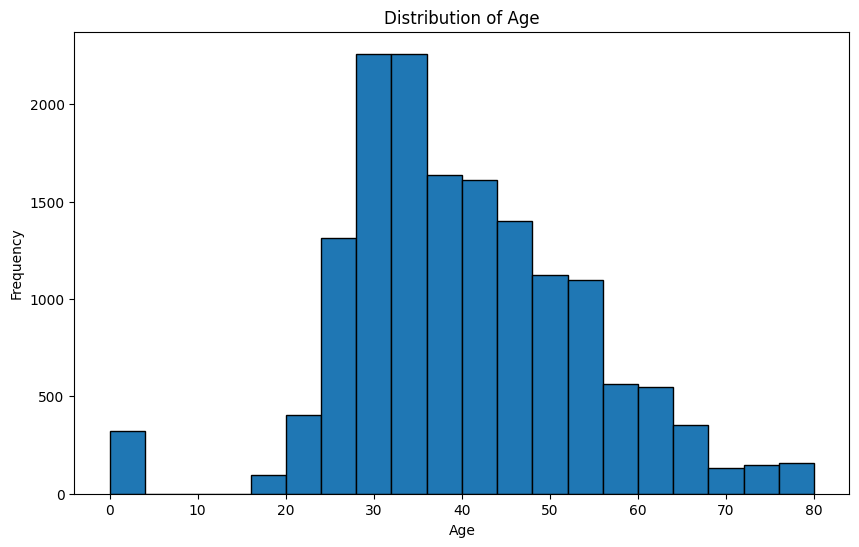

<ipython-input-79-e8a246e3cec6>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True)


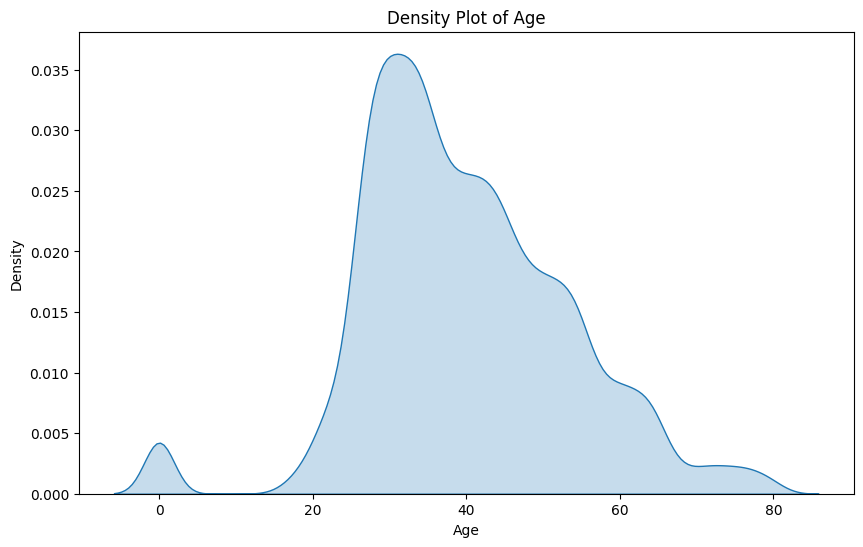

In [ ]:
# Histogram of 'Age'
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Density plot of 'Age'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Age'], shade=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
print(data["Age"].min())

0


In [ ]:
print(data["Age"].max())

80


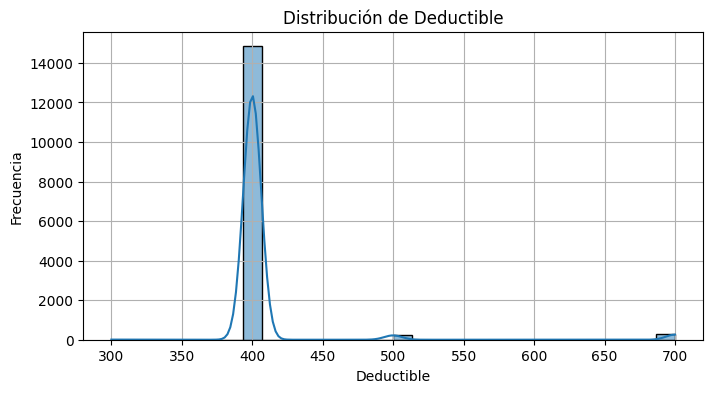

In [ ]:
# Display of deductible variable
plt.figure(figsize=(8, 4))
sns.histplot(data['Deductible'], bins=30, kde=True)
plt.title('Distribución de Deductible')
plt.xlabel('Deductible')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# Análisis narrativo
- La variable "Age" presenta un 3.55% de outliers, de este porcentaje siendo la mayoría de sus valores en cero, lo que no es coherente para una variable de edad. Esto indica posibles errores de captura o datos faltantes. Se recomienda excluirla del análisis, ya que podría afectar negativamente al modelo.

- La variable "Deductible" presentó 582 valores atípicos, lo que representa aproximadamente el 3.77% del total de observaciones. Estos outliers fueron identificados utilizando el método del rango intercuartílico (IQR). Aunque el porcentaje no es excesivamente alto, es relevante considerar su impacto en el análisis posterior, especialmente si se trata de modelos sensibles a valores extremos, como los basados en distancias o regresiones lineales.

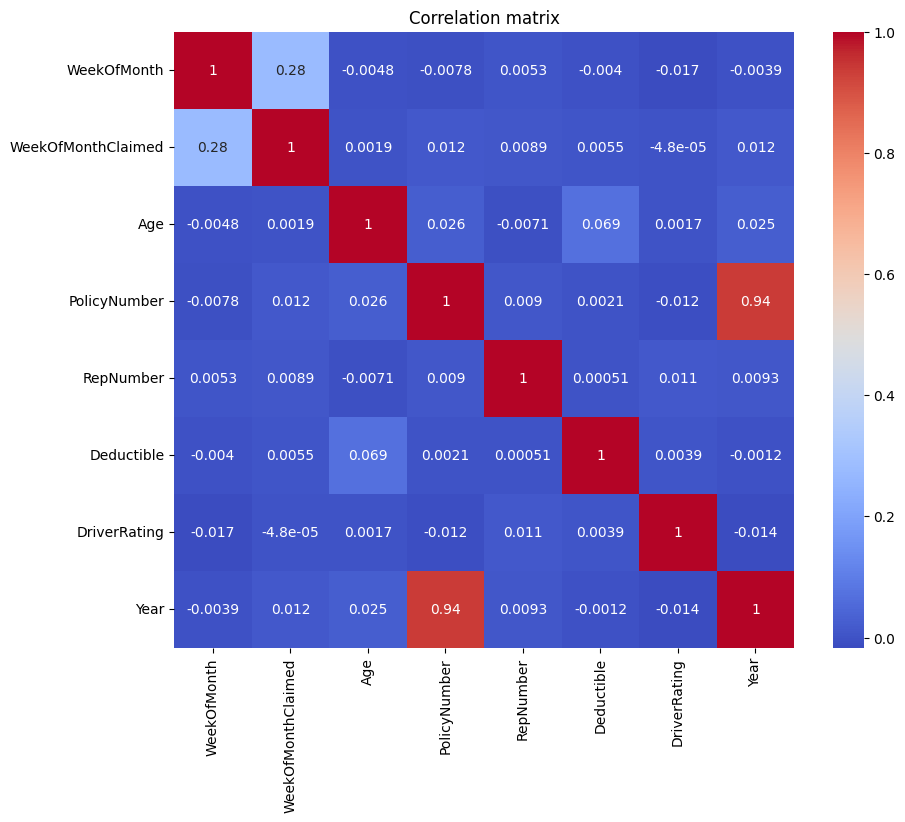

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

 #Análisis narrativo

Aunque no se observa una multicolinealidad generalizada en todo el conjunto de datos, si existen casos puntuales de correlación fuerte que deben ser tratados revisados y analizados para ver si aportan al modelo.

In [ ]:
# Data cleaning
data1 = data.drop (columns=['Age'])
# Perform other cleanings and checks in 'data1'.
data1 = data1.dropna()
data1 = data1.drop_duplicates()


La presencia de valores faltantes y la posible multicolinealidad pueden afectar negativamente el rendimiento del modelo, por lo que se decide eliminarla para mejorar la calidad de los datos y la interpretación del modelo.

In [ ]:
# Eliminate identifying variables "PolicyNumber" and "RepNumber"
data1 = data.drop(columns=["PolicyNumber", "RepNumber","Month","Year"])

Las variables "PolicyNumber" y "RepNumber" son variables identificadoras y no tienen relevancia para la predicción, por lo que se decide eliminar.

# 3. Data Splitting

In [ ]:
#Primera partición al 75% de los datos
train_data, temp_data = train_test_split(data, train_size=0.75, random_state=6, stratify=data[["FraudFound"]])
#Segunda partición al 25% (con 15 y 10)
val_data, test_data = train_test_split(temp_data, train_size=0.60, random_state=9, stratify=temp_data["FraudFound"])

In [ ]:
len(data), len(train_data), len(val_data),len(test_data)

(15420, 11565, 2313, 1542)

In [ ]:
print("Train_data:", (train_data["FraudFound"].value_counts(normalize=True)))
print("Val_data:", (val_data["FraudFound"].value_counts(normalize=True)))
print("Test_data:",(test_data["FraudFound"].value_counts(normalize=True)))

Train_data: FraudFound
No     0.940164
Yes    0.059836
Name: proportion, dtype: float64
Val_data: FraudFound
No     0.939905
Yes    0.060095
Name: proportion, dtype: float64
Test_data: FraudFound
No     0.940337
Yes    0.059663
Name: proportion, dtype: float64


# 4. Exploratory Data Analysis

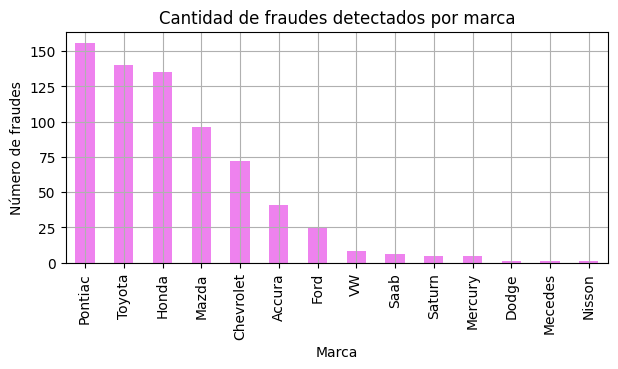

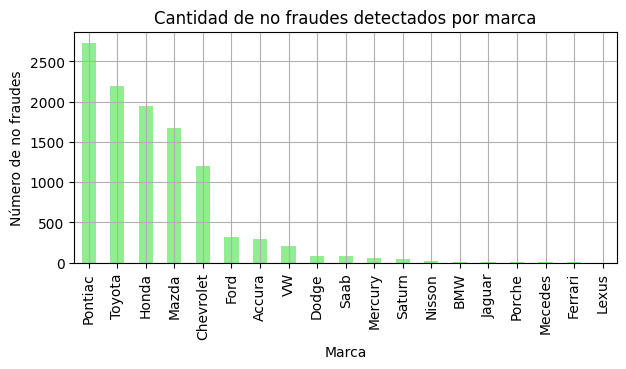

In [ ]:
#grafico de fraudes para la columna Make

fraud_make = train_data[train_data['FraudFound'] == "Yes"]
fraud_counts_make = fraud_make['Make'].value_counts()
plt.figure(figsize=(7, 3))
fraud_counts_make.plot(kind='bar', color='violet')
plt.title('Cantidad de fraudes detectados por marca')
plt.xlabel('Marca')
plt.ylabel('Número de fraudes')
plt.grid(True)

#grafico de nofraudes para la columna Make

no_fraud_make = train_data[train_data['FraudFound'] == "No"]
no_fraud_counts_make = no_fraud_make['Make'].value_counts()
plt.figure(figsize=(7, 3))
no_fraud_counts_make.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de no fraudes detectados por marca')
plt.xlabel('Marca')
plt.ylabel('Número de no fraudes')
plt.grid(True)


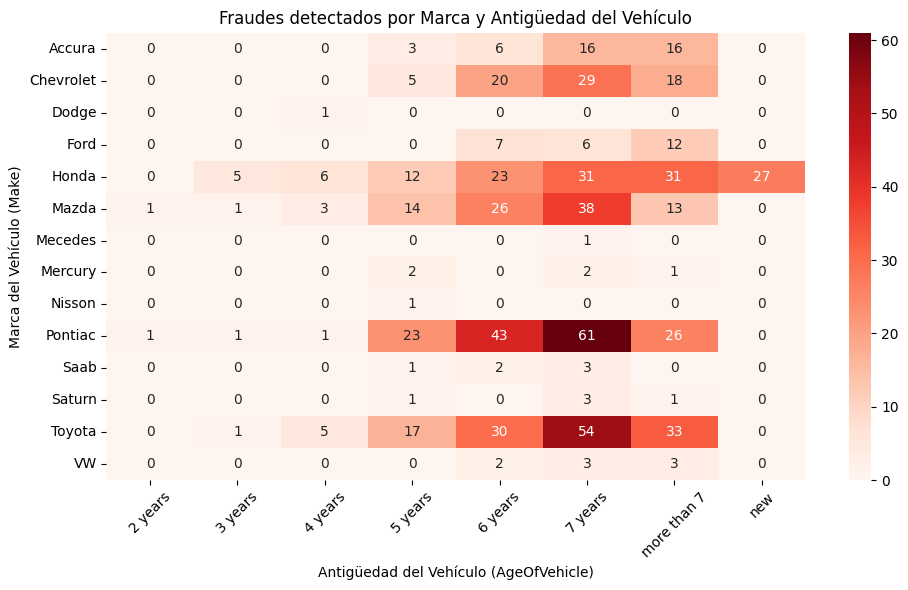

In [ ]:
#graficode fraudes para la columna Make cruzado AgeOfVehicle y FraudFround == Yes
# Filtrar solo fraudes detectados
fraud_data = train_data[train_data["FraudFound"] == "Yes"]

# Crear tabla cruzada (frecuencia)
heatmap_data = pd.crosstab(fraud_data["Make"], fraud_data["AgeOfVehicle"])

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Fraudes detectados por Marca y Antigüedad del Vehículo")
plt.ylabel("Marca del Vehículo (Make)")
plt.xlabel("Antigüedad del Vehículo (AgeOfVehicle)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 5
#1 Pontiac 61 (7 años) y 43 (6 años)
#2 Toyota 54 (7 años) y 30 (6 años)
#3 Mazda 38 (7 años) y 26 (6 años)
#4 Honda 31 (7 años) y 23 (6 años)
#5 Chevrolet 29 (7 años) y 20 (6 años)


Text(0, 0.5, 'Número de no fraudes detectatdos')

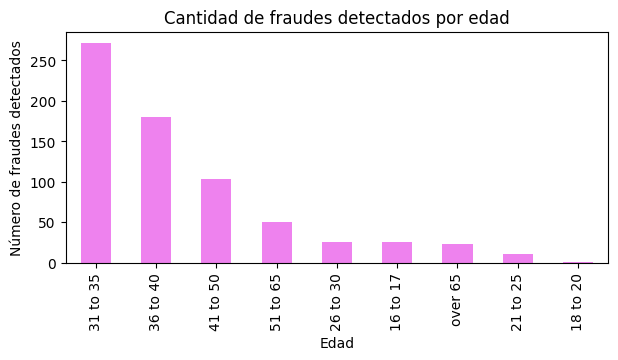

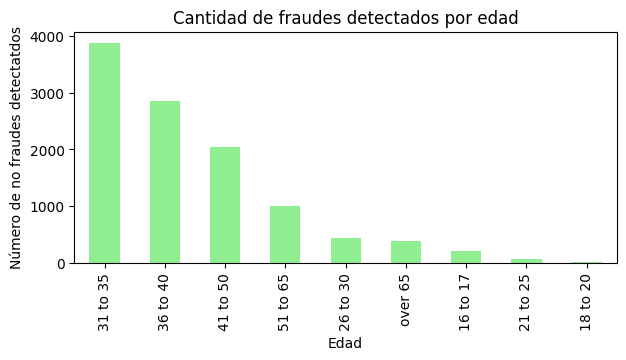

In [ ]:
# Gráfico de barras para AgeOfPolicyHolder y Fraud Found = Yes
fraud_age = train_data[train_data['FraudFound'] == "Yes"]
fraud_counts_age = fraud_age['AgeOfPolicyHolder'].value_counts()
plt.figure(figsize=(7, 3))
fraud_counts_age.plot(kind='bar', color='violet')
plt.title('Cantidad de fraudes detectados por edad')
plt.xlabel('Edad')
plt.ylabel('Número de fraudes detectados')

# Gráfico de barras para AgeOfPolicyHolder y Fraud Found = No
fraud_age = train_data[train_data['FraudFound'] == "No"]
fraud_counts_age = fraud_age['AgeOfPolicyHolder'].value_counts()
plt.figure(figsize=(7, 3))
fraud_counts_age.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de fraudes detectados por edad')
plt.xlabel('Edad')
plt.ylabel('Número de no fraudes detectatdos')

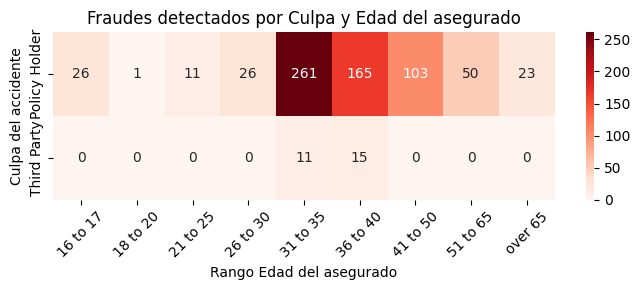

In [ ]:
#grafico de fraudes para la columna Fault cruzado AgeOfPolicyHolder y FraudFround == Yes
# Filtrar solo fraudes detectados
fraud_data_age = train_data[train_data["FraudFound"] == "Yes"]

# Crear tabla cruzada (frecuencia)
heatmap_data = pd.crosstab(fraud_data_age["Fault"], fraud_data_age["AgeOfPolicyHolder"])

# Graficar
plt.figure(figsize=(7, 3))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Fraudes detectados por Culpa y Edad del asegurado")
plt.ylabel("Culpa del accidente")
plt.xlabel("Rango Edad del asegurado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Hallazgo
#1 (31 a 35 años) Police Holder 261
#2 (36 a 40 años) Police Holder 165
#3 (41 a 50 años) Police Holder 103

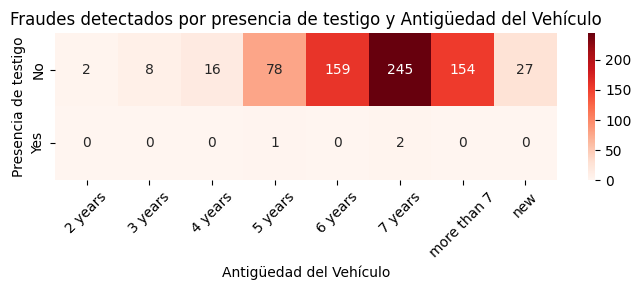

In [ ]:
#grafico de fraudes para la columna DriverRating cruzado AgeOfPolicyHolder y FraudFround == Yes
# Filtrar solo fraudes detectados
fraud_data_age = train_data[train_data["FraudFound"] == "Yes"]

# Crear tabla cruzada (frecuencia)
heatmap_data = pd.crosstab(fraud_data_age["WitnessPresent"], fraud_data_age["AgeOfVehicle"])

# Graficar
plt.figure(figsize=(7, 3))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Fraudes detectados por presencia de testigo y Antigüedad del Vehículo")
plt.ylabel("Presencia de testigo")
plt.xlabel("Antigüedad del Vehículo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Hallazgo: No hubo testigos donde se detecta el fraude
#1 (7 años) 245
#2 (6 años) 159
#3 (mas de 7 años) 154

## Feature Engineering

In [ ]:
#Indicaciones: No usar Age, Month, PoliceType,Year - Quitar RepNumber

In [ ]:
#Feature 1: Identificar las marcas con probabilidad de hallar fraudes en siniestros
#Top 5
#1 Pontiac 61 (7 años) y 43 (6 años)
#2 Toyota 54 (7 años) y 30 (6 años)
#3 Mazda 38 (7 años) y 26 (6 años)
#4 Honda 31 (7 años) y 23 (6 años)
#5 Chevrolet 29 (7 años) y 20 (6 años)
train_data["IsTopMake"] = train_data["Make"].apply(lambda x: 1 if x in ["Pontiac", "Toyota", "Mazda", "Honda", "Chevrolet"] else 0)

#Feature 2: Identificar la antiguedad del vehiculo con probabilidad de hallar fraudes en siniestros
train_data["HighFraudRisk_VehicleAge"] = train_data["AgeOfVehicle"].apply(
    lambda x: 1 if x in ["6 years", "7 years","more than 7"] else 0
)


In [ ]:
#Para Val_data

val_data["IsTopMake"] = val_data["Make"].apply(lambda x: 1 if x in ["Pontiac", "Toyota", "Mazda", "Honda", "Chevrolet"] else 0)

#Feature 2: Identificar la antiguedad del vehiculo con probabilidad de hallar fraudes en siniestros
val_data["HighFraudRisk_VehicleAge"] = val_data["AgeOfVehicle"].apply(
    lambda x: 1 if x in ["6 years", "7 years","more than 7"] else 0)

In [ ]:
#Para test_data

test_data["IsTopMake"] = test_data["Make"].apply(lambda x: 1 if x in ["Pontiac", "Toyota", "Mazda", "Honda", "Chevrolet"] else 0)

#Feature 2: Identificar la antiguedad del vehiculo con probabilidad de hallar fraudes en siniestros
test_data["HighFraudRisk_VehicleAge"] = test_data["AgeOfVehicle"].apply(
    lambda x: 1 if x in ["6 years", "7 years","more than 7"] else 0)

## Re-sampling (if needed)

In [ ]:
#variables que son numericas en el train data
numerical_columns = train_data.select_dtypes(include=["number"]).columns
numerical_columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Year', 'IsTopMake',
       'HighFraudRisk_VehicleAge'],
      dtype='object')

## Encoding pipeline

In [ ]:
# Eliminar filas con '0' en columnas problemáticas
columnas_con_cero = ['DayOfWeekClaimed', 'MonthClaimed']

for col in columnas_con_cero:
    for df in [train_data, val_data, test_data]:
        df.drop(df[df[col] == '0'].index, inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Orden de categorías por columna
ordinal_categories = [
    # Días
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],  # DayOfWeek
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],  # DayOfWeekClaimed
    # Meses
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],  # MonthClaimed
    # DriverRating
    ["1", "2", "3", "4"],
    # Días política
    ["none", "1 to 7", "8 to 15", "15 to 30", "more than 30"],  # Days:Policy-Accident
    ["none", "8 to 15", "15 to 30", "more than 30"],            # Days:Policy-Claim
    # Edad del vehículo
    ["new", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "more than 7"],
    # Edad del asegurado
    ["16 to 17", "18 to 20", "21 to 25", "26 to 30", "31 to 35", "36 to 40", "41 to 50", "51 to 65", "over 65"],
    # Suplementos
    ["none", "1 to 2", "3 to 5", "more than 5"],
    # Reclamaciones pasadas
    ["none", "1", "2 to 4", "more than 4"],
    # Cambios de dirección
    ["no change", "under 6 months", "1 year", "2 to 3 years", "4 to 8 years", "more than 4"],
    # Número de autos
    ["1 vehicle", "2 vehicles", "3 to 4", "5 to 8", "more than 8"],
    # Precio del vehículo
    ["less than 20,000", "20,000 to 29,000", "30,000 to 39,000", "40,000 to 59,000", "60,000 to 69,000", "more than 69,000"],
]

ordinal_columns = [
    "DayOfWeek", "DayOfWeekClaimed", "MonthClaimed", "DriverRating",
    "Days:Policy-Accident", "Days:Policy-Claim", "AgeOfVehicle",
    "AgeOfPolicyHolder", "NumberOfSuppliments", "PastNumberOfClaims",
    "AddressChange-Claim", "NumberOfCars", "VehiclePrice"
]

categorical_columns = [
    'Make', 'MaritalStatus', 'AgentType', 'VehicleCategory', 'BasePolicy'
]

binary_columns = [
    'AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'HighFraudRisk_VehicleAge', 'IsTopMake', 'FraudFound'
]

columns_to_drop = ["Month", "Year", "Age", "PolicyType", "RepNumber"]

# Pipeline para datos ordinales
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# Pipeline para variables nominales
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Pipeline para binarios (los tratamos como ordinales codificados como 0/1)
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', OrdinalEncoder())  # Asume dos categorías ordenadas alfabéticamente
])

# ColumnTransformer para juntar todo
preprocessor = ColumnTransformer([
    ('ord', ordinal_pipeline, ordinal_columns),
    ('cat', onehot_pipeline, categorical_columns),
    ('bin', binary_pipeline, binary_columns),
], remainder='passthrough')  # Incluye las variables numéricas y objetivo si las hay

# Pipeline general
full_pipeline = Pipeline([
    ('drop_cols', 'passthrough'),  # placeholder
    ('preprocess', preprocessor)
])


Aplicando el pipeline

In [ ]:
# Eliminar columnas no deseadas
train_data = train_data.drop(columns=columns_to_drop)
val_data = val_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# Asegurarse de que todas las columnas sean str donde se requiere
for col in ordinal_columns + categorical_columns + binary_columns:
    train_data[col] = train_data[col].astype(str)
    val_data[col] = val_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

# Fit y transform
train_transformed = full_pipeline.fit_transform(train_data)
val_transformed = full_pipeline.transform(val_data)
test_transformed = full_pipeline.transform(test_data)


In [ ]:
column_names = full_pipeline.get_feature_names_out()

X_train = pd.DataFrame(train_transformed, columns=column_names, index=train_data.index)
X_val = pd.DataFrame(val_transformed, columns=column_names, index=val_data.index)
X_test = pd.DataFrame(test_transformed, columns=column_names, index=test_data.index)


## Scaling (if needed)

In [ ]:
#Ya que se aplicará el modelo basado en árboles de desición XGBoost no se requiere aplicar escalado de datos

# **Modelado**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

Escoger el mejor modelo utilizando **ensamble**

In [ ]:
features = [
    "ord__DayOfWeek",
    "ord__DayOfWeekClaimed",
    "ord__MonthClaimed",
    "ord__DriverRating",
    "ord__Days:Policy-Accident",
    "ord__Days:Policy-Claim",
    "ord__PastNumberOfClaims",
    "ord__AgeOfVehicle",
    "ord__AgeOfPolicyHolder",
    "ord__NumberOfSuppliments",
    "ord__AddressChange-Claim",
    "ord__NumberOfCars",
    "cat__MaritalStatus_Divorced",
    "cat__MaritalStatus_Married",
    "cat__MaritalStatus_Single",
    "cat__MaritalStatus_Widow",
    "cat__VehicleCategory_Sedan",
    "cat__VehicleCategory_Sport",
    "cat__VehicleCategory_Utility",
    "cat__BasePolicy_All Perils",
    "cat__BasePolicy_Collision",
    "cat__BasePolicy_Liability",
    "bin__AccidentArea",
    "bin__Sex",
    "bin__Fault",
    "bin__PoliceReportFiled",
    "bin__WitnessPresent",
    "bin__HighFraudRisk_VehicleAge",
    "bin__IsTopMake"
]


No se consideraron las siguientes features debido:


*   "PolicyNumber" es un identificador
*   "Deductible" (tienen un solo valor y no es representativo)
*   "AgentType" (casi todos son de tipo 0 y tiene mucha relevancia, sesga el modelo)





In [ ]:
model1 = DecisionTreeClassifier(min_samples_leaf=100, random_state=1)
model2 = KNeighborsClassifier()
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model4 = SVC(probability=True, random_state=42)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('dt', model2),
        ('xgb', model3),
        ('svc', model4),
    ],
    voting='soft'  # 'soft' usa probabilidades → mejor si todos soportan predict_proba
)

In [ ]:
voting_clf.fit(X=X_train[features].values, y=X_train["bin__FraudFound"].values)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:01:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('lr',
                              DecisionTreeClassifier(min_samples_leaf=100,
                                                     random_state=1)),
                             ('dt', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            featur...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
from sklearn.metrics import classification_report
#DecisionTreeClassifier

predictions_dt = voting_clf.estimators_[0].predict(X_train[features])
target = X_train["bin__FraudFound"]

print(classification_report(y_true=target, y_pred=predictions_dt))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10872
         1.0       0.00      0.00      0.00       692

    accuracy                           0.94     11564
   macro avg       0.47      0.50      0.48     11564
weighted avg       0.88      0.94      0.91     11564



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

In [ ]:
#KNeighborsClassifier
predictions_dt = voting_clf.estimators_[1].predict(X_train[features].values)
print(classification_report(y_true=target, y_pred=predictions_dt))


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10872
         1.0       0.70      0.06      0.11       692

    accuracy                           0.94     11564
   macro avg       0.82      0.53      0.54     11564
weighted avg       0.93      0.94      0.92     11564



In [ ]:
#XGBClassifier
predictions_dt = voting_clf.estimators_[2].predict(X_train[features].values)
print(classification_report(y_true=target, y_pred=predictions_dt))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     10872
         1.0       0.99      0.47      0.64       692

    accuracy                           0.97     11564
   macro avg       0.98      0.73      0.81     11564
weighted avg       0.97      0.97      0.96     11564



In [ ]:
#SVC
predictions_dt = voting_clf.estimators_[3].predict(X_train[features].values)
print(classification_report(y_true=target, y_pred=predictions_dt))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10872
         1.0       0.00      0.00      0.00       692

    accuracy                           0.94     11564
   macro avg       0.47      0.50      0.48     11564
weighted avg       0.88      0.94      0.91     11564



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#El que da mejores métricas de manera general (más balanceado) es XGBoost, y será elegido para este modelo.

***Balamceo de la target***

In [ ]:
from imblearn.over_sampling import SMOTE

#balancear la columna FraudFoundYes con Smote
smote = SMOTE(sampling_strategy=0.95, random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train.drop(columns=["bin__FraudFound"]), X_train["bin__FraudFound"])
train_data["bin__FraudFound"]=y_resampled
train_data["bin__FraudFound"].value_counts(normalize=True)

,proportion
bin__FraudFound,
0.0,0.701833
1.0,0.298167


In [ ]:
from imblearn.over_sampling import SMOTE

# Aplica SMOTE
#smote = SMOTE(sampling_strategy=0.95, random_state=42)
#Xv_resampled, yv_resampled = smote.fit_resample(X_val.drop(columns=["bin__FraudFound"]), X_val["bin__FraudFound"])

# Crea un nuevo DataFrame con las columnas de X_val + la columna objetivo
#X_val_balanced = Xv_resampled.copy()
#X_val_balanced["bin__FraudFound"] = yv_resampled

# Ahora puedes revisar la distribución
#X_val_balanced["bin__FraudFound"].value_counts(normalize=True)


In [ ]:
# Aplica SMOTE
#smote = SMOTE(sampling_strategy=0.95, random_state=42)
Xs_resampled, ys_resampled = smote.fit_resample(X_test.drop(columns=["bin__FraudFound"]), X_test["bin__FraudFound"])

# Crea un nuevo DataFrame con las columnas de X_val + la columna objetivo
#X_test_balanced = Xs_resampled.copy()
#X_test_balanced["bin__FraudFound"] = ys_resampled

# Ahora puedes revisar la distribución
#X_test_balanced["bin__FraudFound"].value_counts(normalize=True)


# 5. Train model/Tune hyperparameters

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [125]:
 # 1. Variables predictoras y objetivo

x_train=X_train[features]
y_train = X_train["bin__FraudFound"]


x_val=X_val[features]
y_val = X_val["bin__FraudFound"]

#weigth
from collections import Counter

# Suponiendo que y_train ya tiene valores 0 y 1
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos

# 3. Modelo base
xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight
)


# 4. Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# 5. GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 6. Entrenar
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# 7. Evaluación

y_val_proba = best_model.predict_proba(x_val)[:, 1]

y_pred = (y_val_proba >= 0.35).astype(int)

print(classification_report(y_val, y_pred))





Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      2174
         1.0       0.17      0.45      0.24       139

    accuracy                           0.83      2313
   macro avg       0.56      0.65      0.57      2313
weighted avg       0.91      0.83      0.87      2313



**Análisis de las variables consideradas para el modelo inicial**

In [126]:
importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


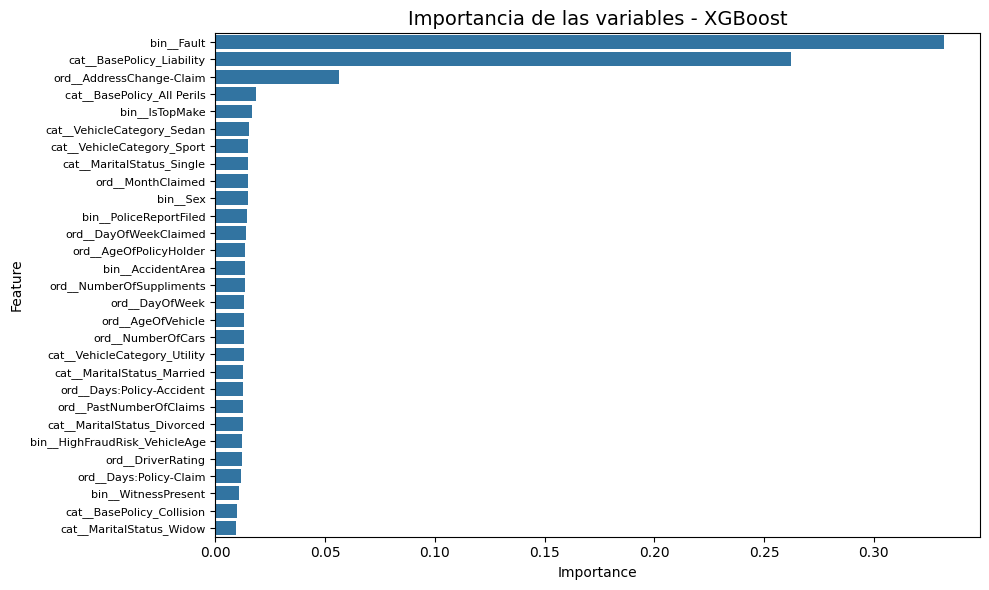

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.title('Importancia de las variables - XGBoost', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)  # Más pequeño para ver los nombres

plt.tight_layout()
plt.show()

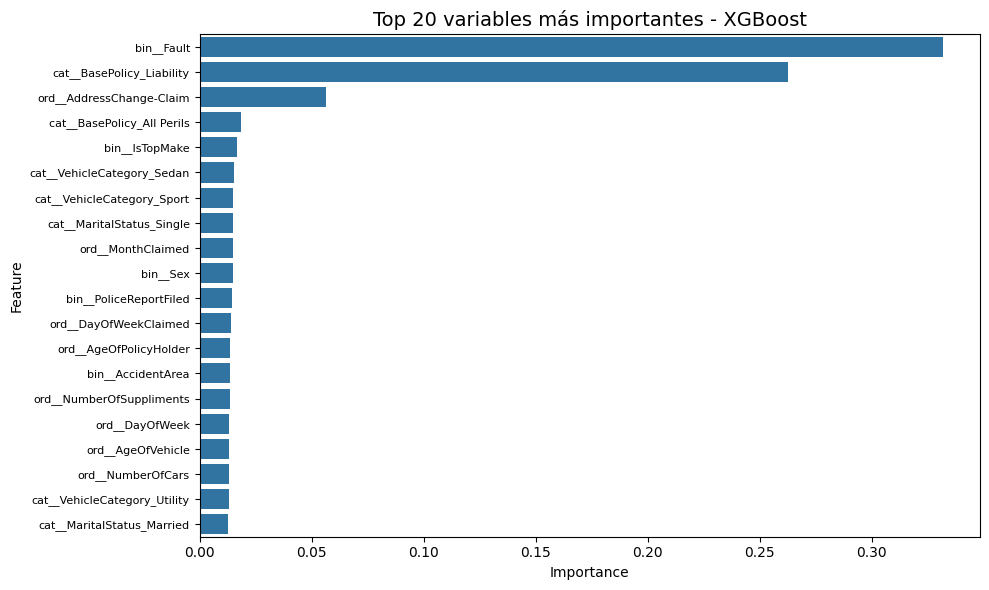

In [128]:
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} variables más importantes - XGBoost', fontsize=14)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

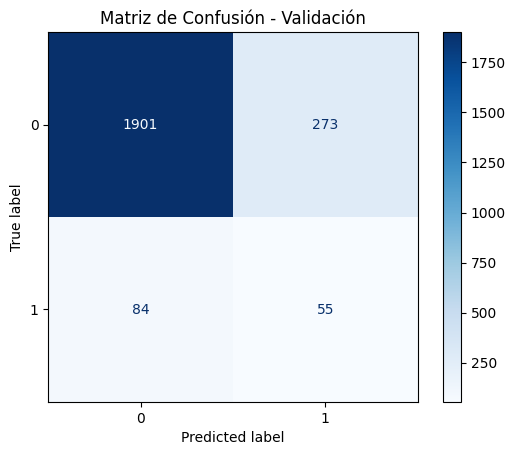

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusión para el conjunto de validación
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Validación")
plt.show()


# 7. Explainability